## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1105]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [1106]:
# Random state seed
rseed = 42

## Load and explore data

In [1107]:
# Import the dataset
df = pd.read_csv("country-data.csv")

In [1108]:
# Check the shape
df.shape

(167, 10)

In [1109]:
# Check datatypes & counts
df.dtypes.value_counts()

float64    7
int64      2
object     1
Name: count, dtype: int64

In [1110]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1111]:
# Identify any missing data
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [1112]:
# Drop any non-numeric features (columns)
data_df = df.drop(["country"], axis=1)
data_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


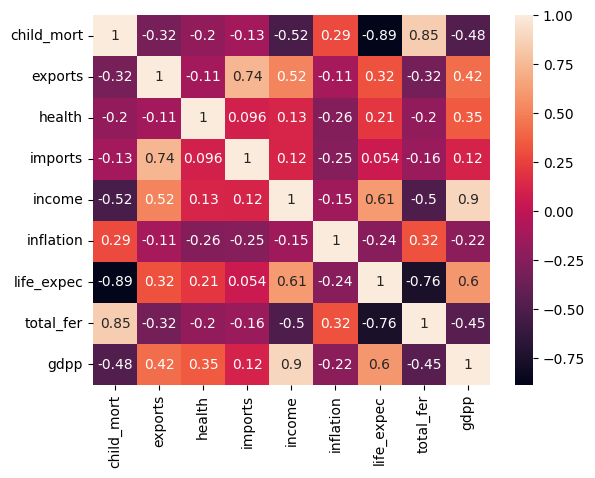

In [1113]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

# Calculate the correlation matrix for the DataFrame 'data_df'
corr = data_df.corr()

# Create a heatmap using Seaborn to visually represent the correlation matrix
# 'data' parameter is set to the correlation matrix 'corr'
sns.heatmap(data=corr, annot=True)

# Display the heatmap
plt.show()



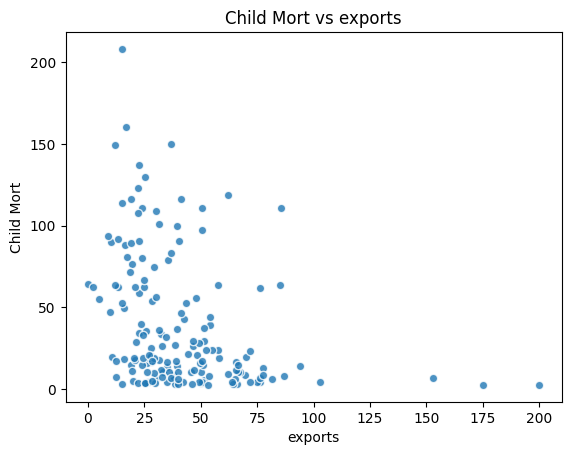

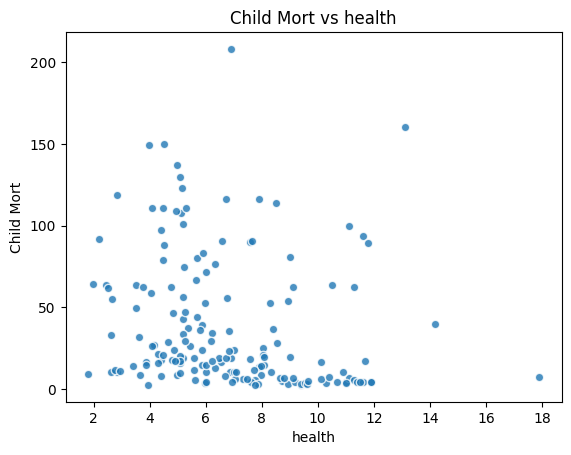

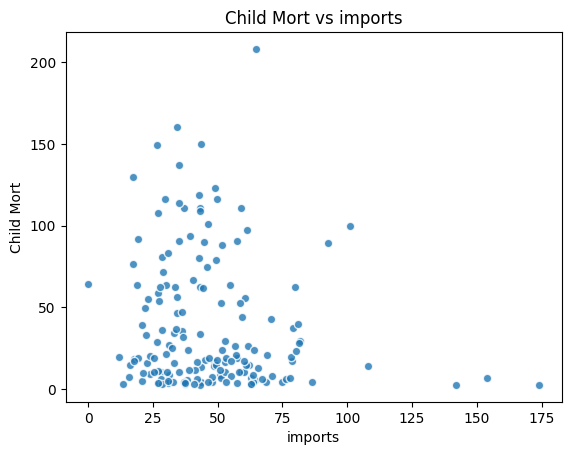

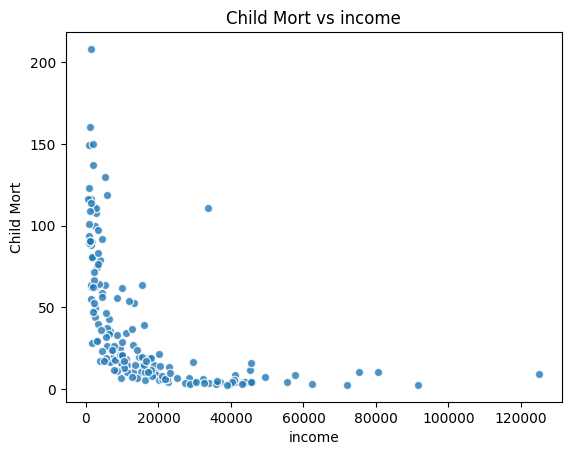

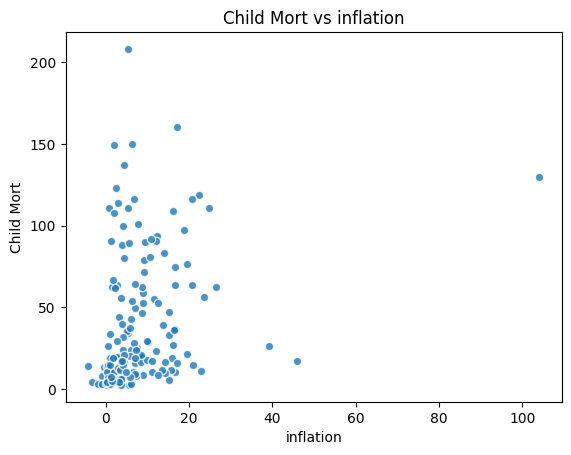

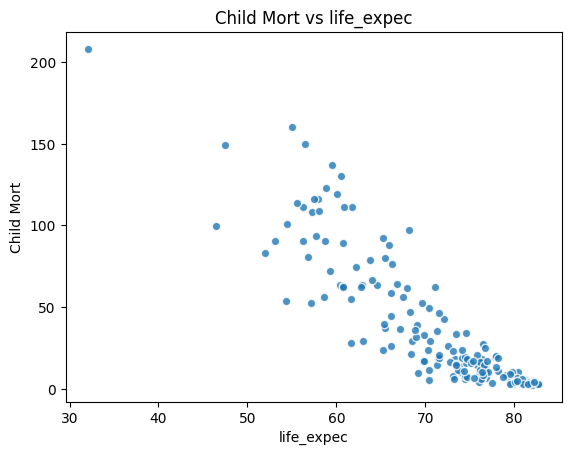

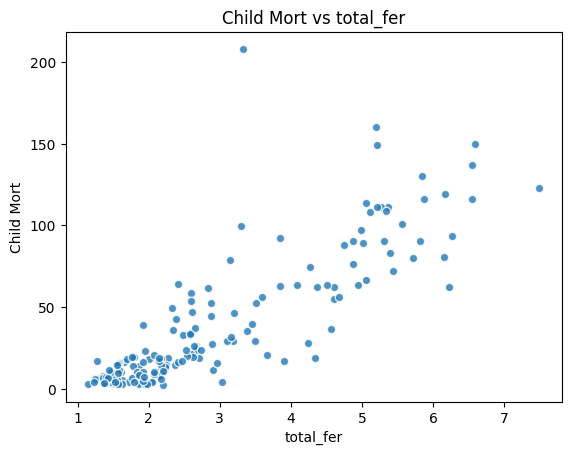

In [1114]:
# Explore the continuous independent features against child_mort using scatter plots.
# for f in data_df.columns[1:-1]:

# Iterate over each column (feature) in 'data_df', excluding the first and last columns
for f in data_df.columns[1:-1]:
  
  # Create a scatter plot for the current feature ('f') against 'child_mort'
  # 'alpha=0.8' sets the transparency of the points, and 'edgecolors='w'' adds white edges to the points for better visibility
  plt.scatter(data_df[f], data_df['child_mort'], alpha=0.8, edgecolors='w')
  
  # Set the label for the x-axis to the current feature ('f')
  plt.xlabel(f)
  
  # Set the label for the y-axis to 'Child Mort'
  plt.ylabel('Child Mort')
  
  # Set the title of the plot to show the relationship between 'Child Mort' and the current feature ('f')
  plt.title(f"Child Mort vs {f}")
  
  # Display the current scatter plot
  plt.show()


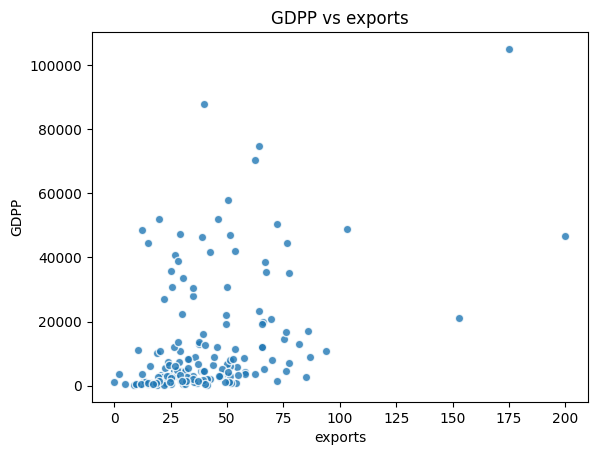

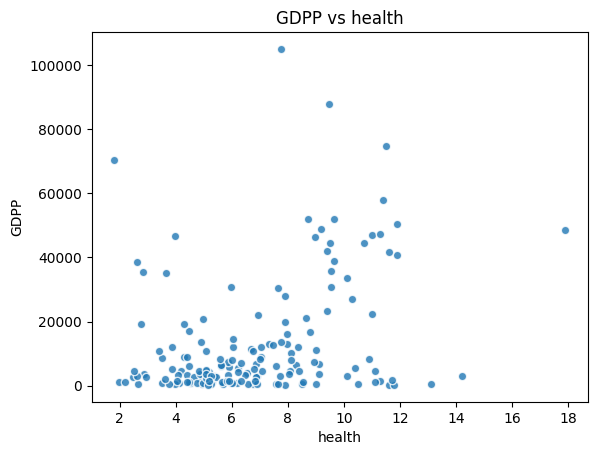

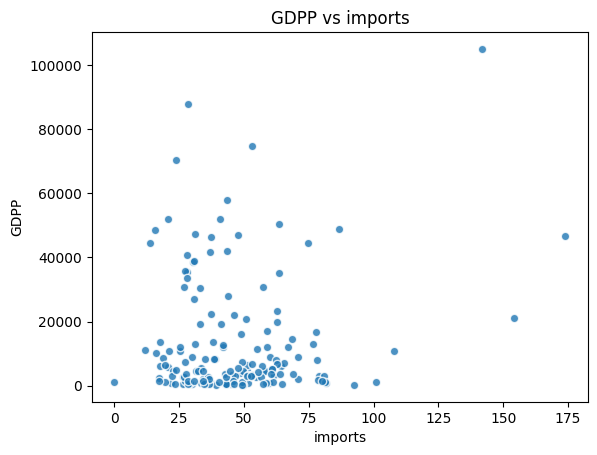

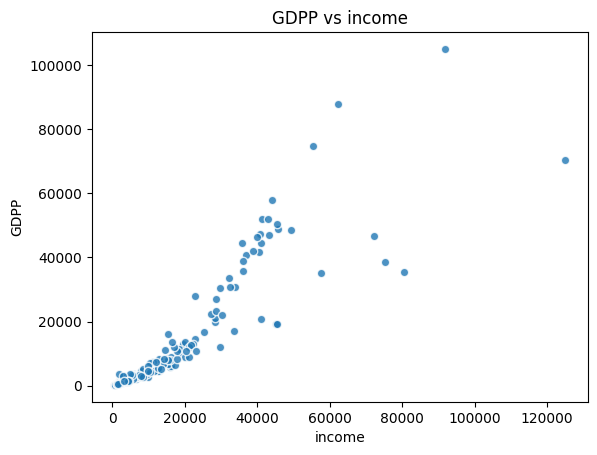

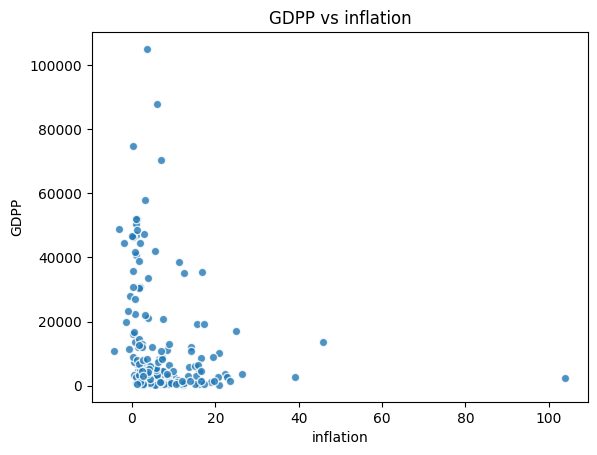

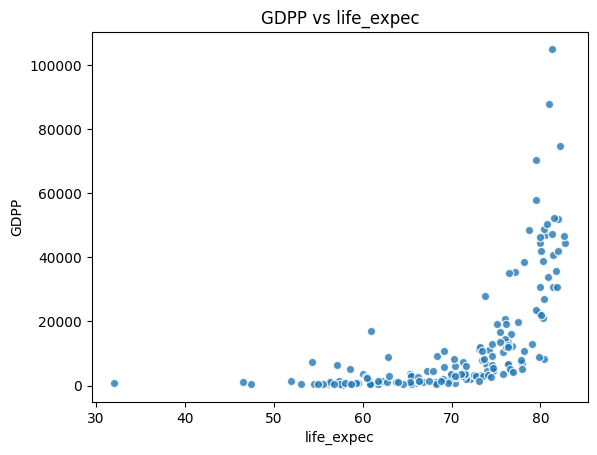

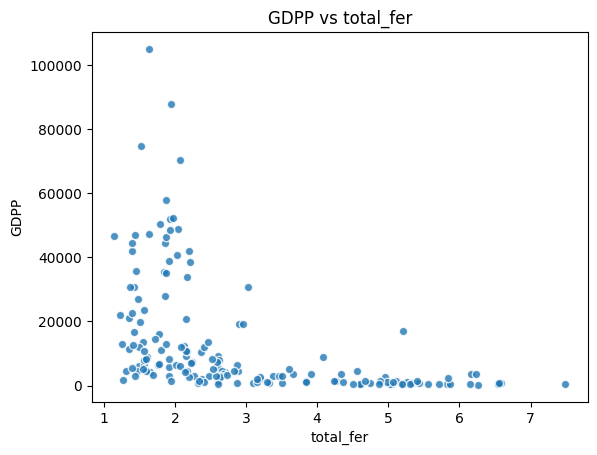

In [1115]:
# Explore the continuous independent features against gdpp using scatter plots.

# Iterate through each column (feature) in the DataFrame 'data_df' excluding the first and last columns
for f in data_df.columns[1:-1]:
    
    # Create a scatter plot for the current feature ('f') against the 'gdpp' column
    # 'alpha=0.8' sets the transparency of the points, and 'edgecolors='w'' adds white edges to the points for better visibility
    plt.scatter(data_df[f], data_df['gdpp'], alpha=0.8, edgecolors='w')
    
    # Set the x-axis label to the current feature
    plt.xlabel(f)
    
    # Set the y-axis label to 'GDPP'
    plt.ylabel('GDPP')
    
    # Set the title of the plot to indicate the relationship being visualized
    plt.title(f"GDPP vs {f}")
    
    # Display the current scatter plot
    plt.show()


C:\Users\abmsajt\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


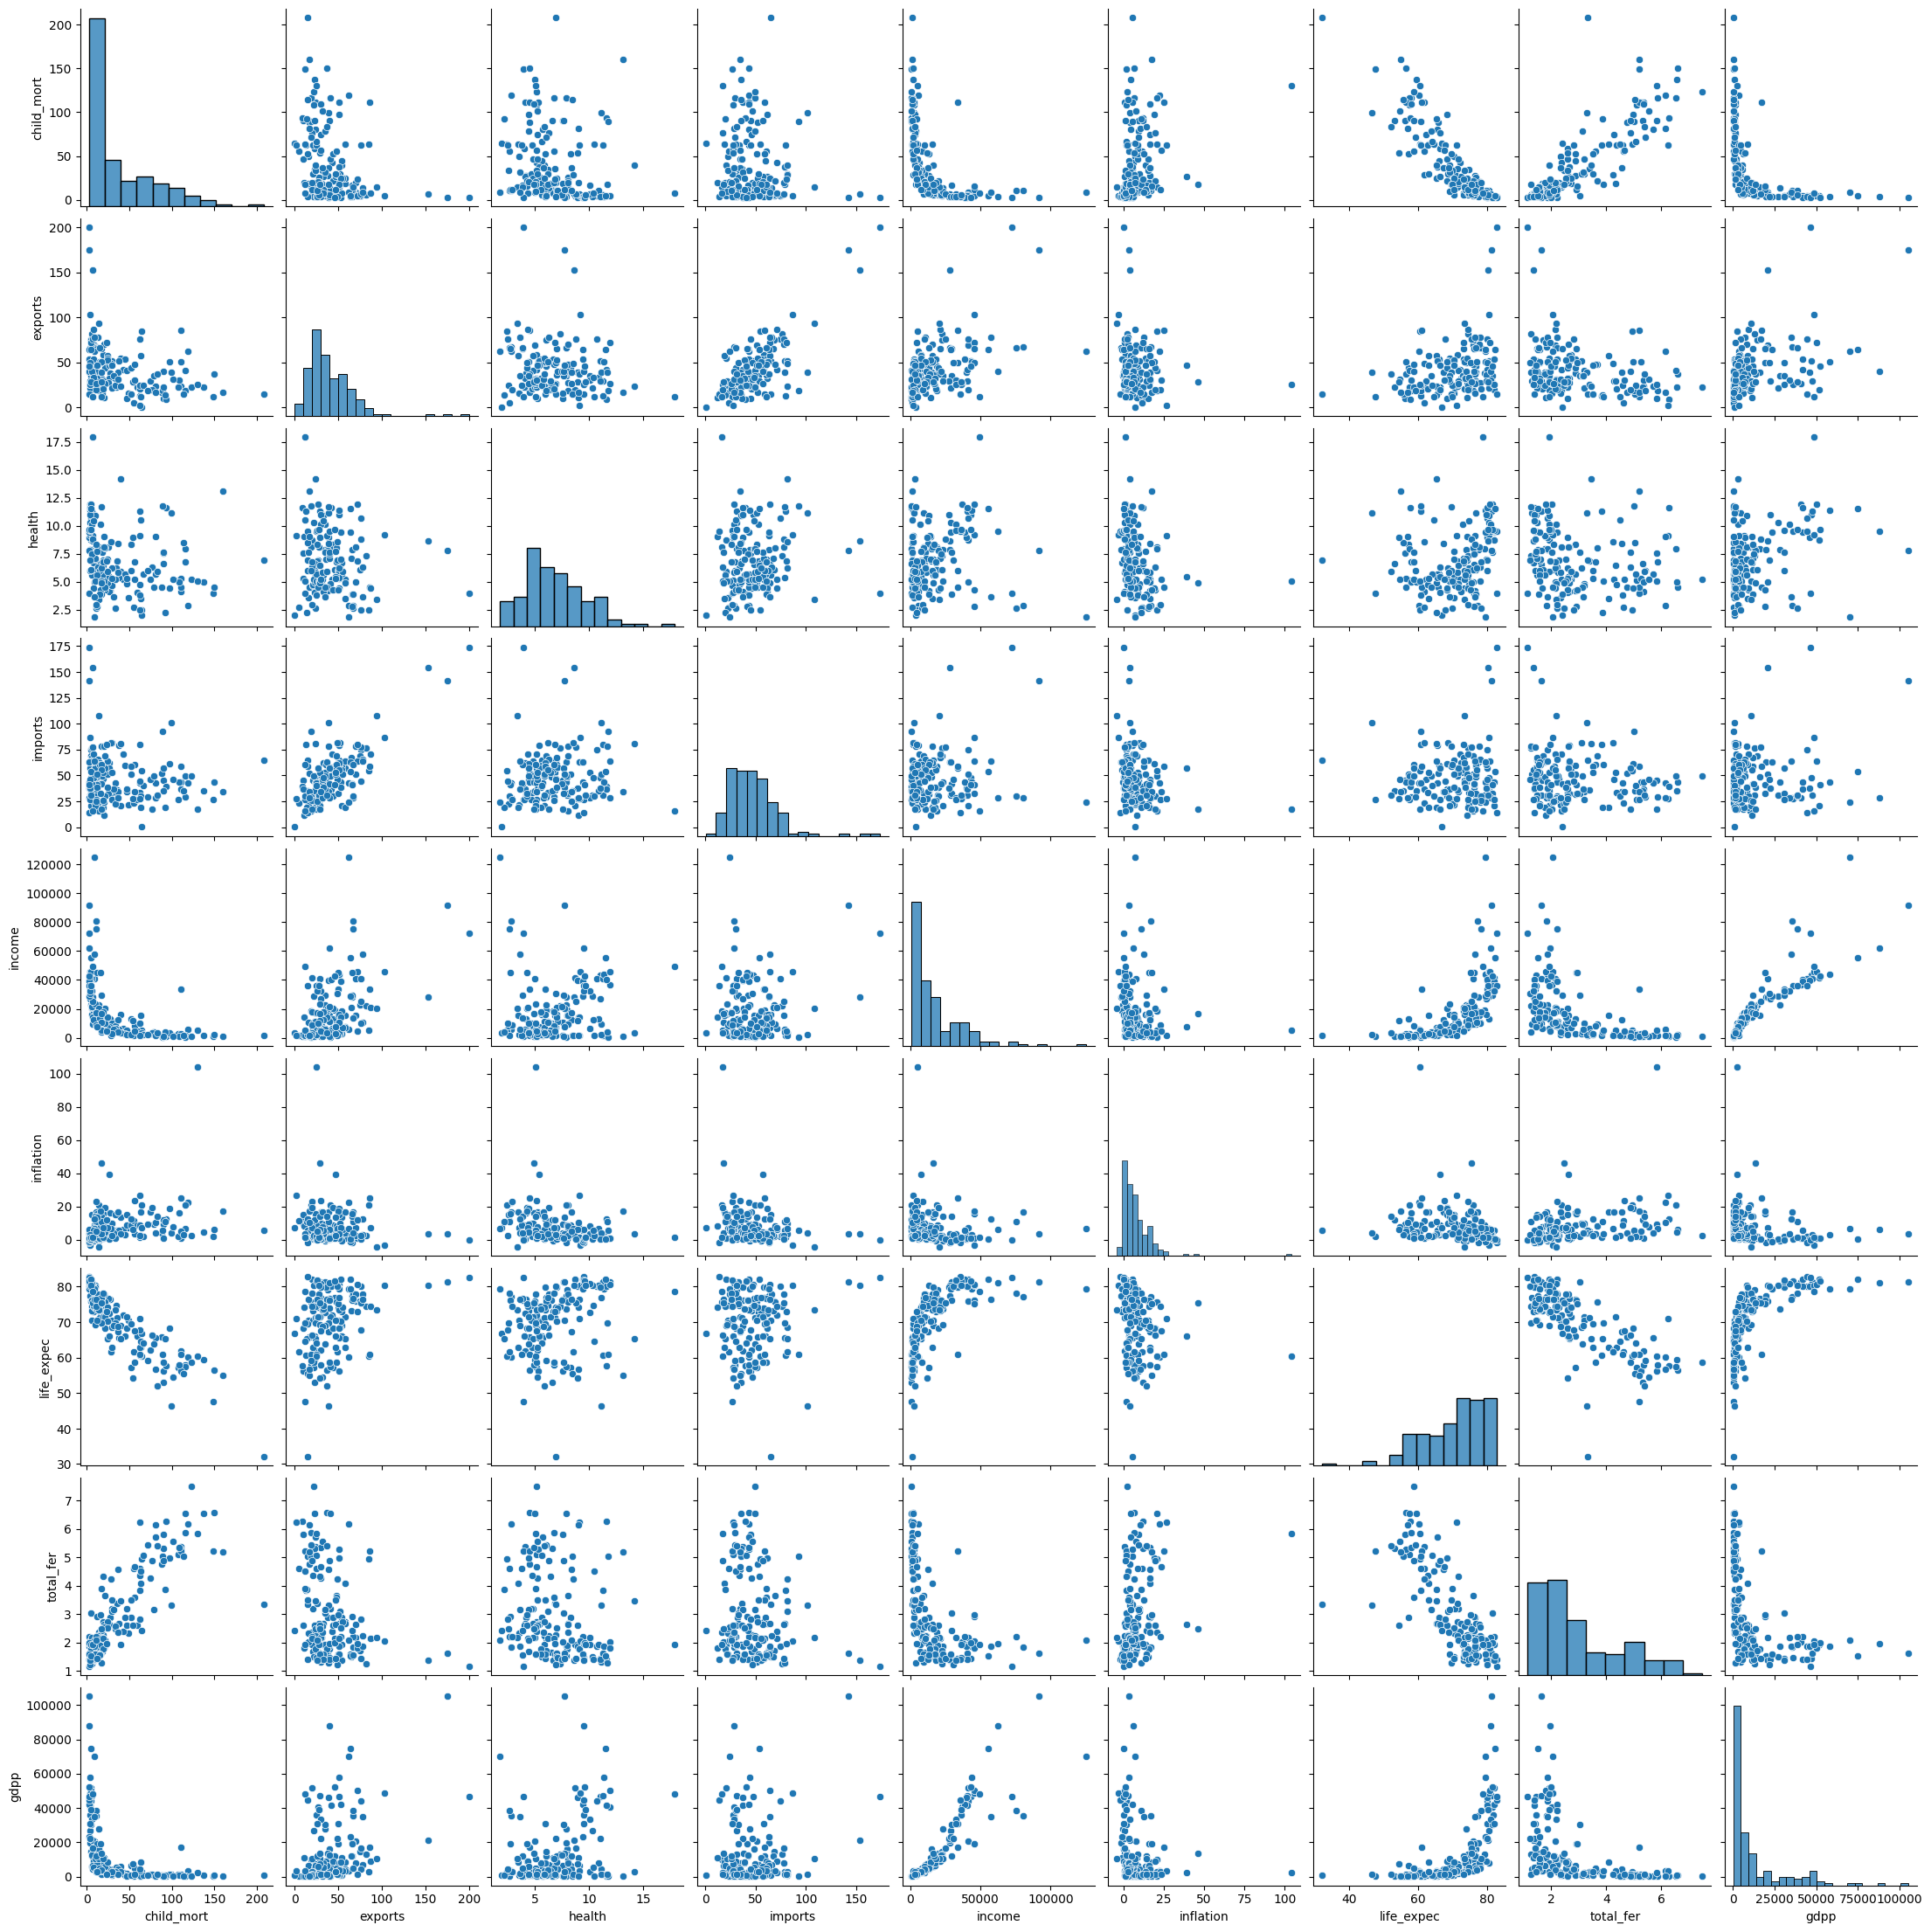

In [1116]:
# Create a pair plot
# Hint: Explore seaborn pairplot

# Create a pair plot using Seaborn for the DataFrame 'data_df'
# A pair plot shows pairwise relationships between variables in the DataFrame
sns.pairplot(data=data_df)
# Display the pair plot

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [1117]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

# Create an instance of the MinMaxScaler class
sc = MinMaxScaler()

# Use the MinMaxScaler to scale the values of the DataFrame 'data_df'
# 'fit_transform' scales and transforms the data, and the result is a NumPy array
scaled_data_array = sc.fit_transform(data_df)

# Create a new DataFrame 'df_scaled' using the scaled data array
# 'columns=data_df.columns' ensures that the column names are retained in the new DataFrame
df_scaled = pd.DataFrame(scaled_data_array, columns=data_df.columns)

# Display the first few rows of the scaled DataFrame to inspect the transformation
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

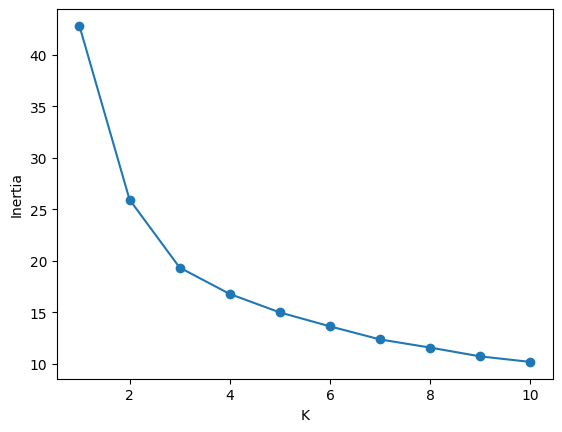

In [1118]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

# Reshape the scaled DataFrame 'df_scaled' into a 2D array with 9 columns
X = df_scaled.values.reshape(-1, 9)

# Call the function 'elbow_Kmeans' with the reshaped data 'X'
elbow_Kmeans(X)


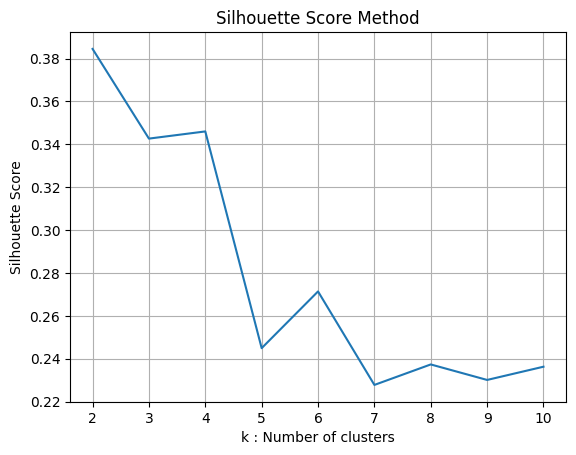

In [1119]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [1120]:
# Remember to set the random_state to rseed

# Set the number of clusters (k) for K-means clustering
k = 2

# Set the random seed (rseed) for reproducibility of results
rseed = 42


In [1121]:
# Count the number of records in each cluster

# Create and initialize a KMeans object with the specified number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the K-means model to the scaled dataset 'df_scaled'
kmeans.fit(df_scaled)

# Get the cluster labels assigned to each data point in the dataset
cluster_labels = kmeans.labels_

# Count the number of records in each cluster
# This creates a dictionary 'cluster_counts' where keys are cluster numbers and values are the counts of data points in each cluster
cluster_counts = {cluster: sum(cluster_labels == cluster) for cluster in range(k)}

# Print the counts of records in each cluster
print(cluster_counts)

{0: 116, 1: 51}


In [1122]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.384471920619431


## Predictions

In [1123]:
# Add the predicted cluster label column to the original dataframe
df_scaled['cluster_label'] = cluster_labels
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


## Visualisation of clusters

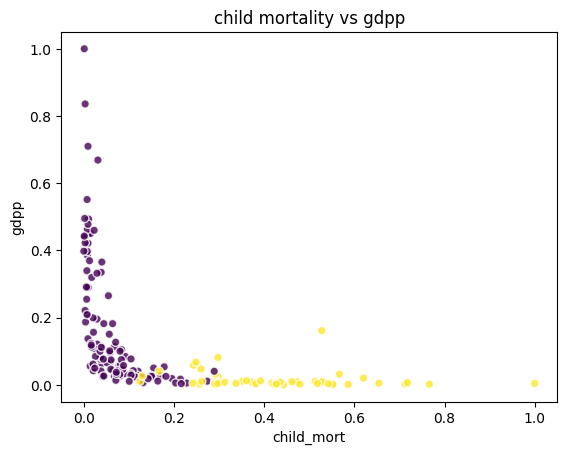

In [1124]:
# Visualisation of clusters: child mortality vs gdpp
plt.scatter(df_scaled["child_mort"], df_scaled['gdpp'], cmap='viridis', c=cluster_labels, alpha=0.8, edgecolors='w')
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.title('child mortality vs gdpp')
plt.show()

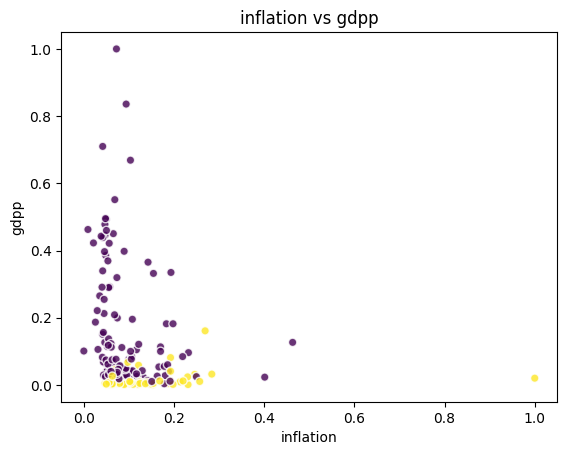

In [1125]:
# Visualisation of clusters: inflation vs gdpp
plt.scatter(df_scaled["inflation"], df_scaled['gdpp'], c=cluster_labels, cmap='viridis', alpha=0.8, edgecolors='w')
plt.xlabel('inflation')
plt.ylabel('gdpp')
plt.title('inflation vs gdpp')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

Countries that are developed have a lower inflation and child mortality rate. Developed countries also have a higher gdpp
Countries that are not developed have a higher child mortality and inflation rate. Least developed countries have a lower gdpp

In [1132]:
# Mapping dictionary for labels
label_mapping = {
    0: 'Developed',
    1: 'Least Developed'
}

# Apply labels to the 'label' column based on the 'cluster_label' column using the mapping dictionary
df_scaled['label'] = df_scaled['cluster_label'].map(label_mapping)

# Analyze the clusters
# Select relevant columns for analysis (child mortality, gdpp, inflation, and the assigned label)
cluster_analysis = df_scaled[['child_mort', 'gdpp', 'inflation', 'label']].groupby('label').mean()

# Print the cluster analysis
print(cluster_analysis)


                 child_mort      gdpp  inflation
label                                           
Developed          0.064894  0.168012   0.095124
Least Developed    0.421053  0.015825   0.146521
